In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3
import sys, os

path_to_src = os.path.join("..", "..", "src")
sys.path.insert(1, path_to_src)
from custom_functions import *

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", 100)
%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [70]:
path_to_db = os.path.join("..", "..", "data", "processed", "main.db")
conn = sqlite3.connect(path_to_db)
query = "SELECT * FROM step2_encoded"
df_main = pd.read_sql(query, conn, index_col="index").reset_index(drop=True)
conn.close()

y = "SalePrice"
y_log = "SalePrice_log"

In [71]:
df_main

,SalePrice,Stories,BldgGrade,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,SqFtDeck,BrickStone,Bedrooms,YrBuilt,YrRenovated,SqFtUnfinBasement,SqFtUnfinished,Bathrooms,Fireplaces,Heating_ElecBB,Heating_FloorWall,Heating_HeatPump,Heating_HotWater,Heating_Other,Heating_Radiant,Condition_Fair,Condition_Good,Condition_Poor,Condition_VeryGood,HeatSource_Electricity,HeatSource_Oil,HeatSource_Other,Porch_Both,Porch_Closed,Porch_Open,Renovated,Garage,Deck,Basement_Finished,Basement_None
0,445000,1.0,7,1480,0,0,0,0,440,120,0,3,1994,0,0,0,2.00,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,1,0,1
1,188500,1.0,5,550,0,0,0,0,0,0,0,2,1942,0,0,0,0.75,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
2,730000,2.0,9,1540,380,285,8,0,0,155,0,3,1984,0,95,0,2.25,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
3,1055700,1.0,8,2780,1390,1390,7,0,0,100,0,6,1967,0,0,0,1.75,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0
4,565000,1.0,8,2230,1280,880,7,400,80,100,0,3,2015,0,400,0,2.00,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17981,391000,1.0,8,1910,620,620,8,0,0,100,0,3,1985,0,0,0,2.25,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,1,0
17982,1535000,2.0,9,3220,0,0,0,0,630,0,0,4,2015,0,0,0,3.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
17983,309000,1.5,7,960,0,0,0,0,420,0,0,3,1959,0,0,0,1.00,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
17984,759990,2.0,8,2010,0,0,0,0,440,0,0,4,1987,0,0,0,2.50,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1


Modeling: SalePrice_log ~ Heating_ElecBB+Heating_FloorWall+Heating_HeatPump+Heating_HotWater+Heating_Radiant+SqFtTotLiving_log+Basement_Finished+Porch_Open+Porch_Closed+Porch_Both


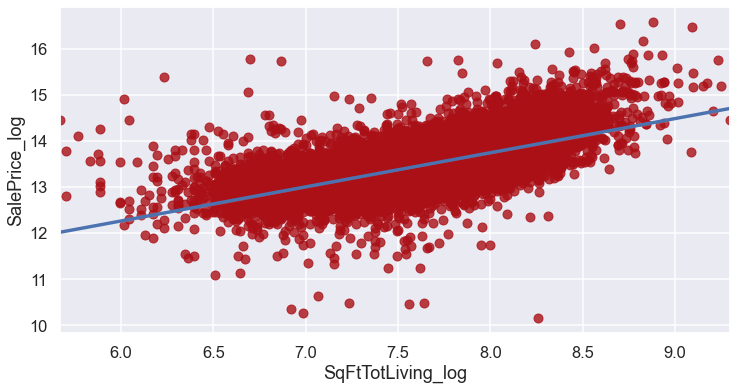

In [101]:
inputs = [
    "Heating_ElecBB",
    "Heating_FloorWall",
    "Heating_HeatPump",
    "Heating_HotWater",
    "Heating_Radiant",
    "SqFtTotLiving_log",
    "Basement_Finished",
    "Porch_Open",
    "Porch_Closed",
    "Porch_Both",
]
output = "SalePrice_log"


log_transform = lambda x: np.log(x)

df_main["SalePrice_log"] = df_main.SalePrice.apply(log_transform)
df_main["SqFtTotLiving_log"] = df_main.SqFtTotLiving.apply(log_transform)
model, df_model = produce_model(df_main, inputs, output)
# results = check_assumptions(model, df_model, output, verbose=True, feature_to_plot='SqFtTotLiving_log')

# #print(model.summary())
# #performance_metrics = performance_metrics.append(results)
# #performance_metrics


# Identify non-categorical features (which are excluded)
df_plotter = df_model.copy()

# loop over all dataframe columns
for col in df_plotter.columns:

    # remove all features with only 2 unique values (binary / one-hot enoded, for which graphical linearity is less relevant)
    if df_plotter[col].value_counts().shape[0] == 2:
        df_plotter.drop(col, axis=1, inplace=True)

sns.set(font_scale=1.2)
# Plot results, as desired
# plt.figure();
# sns.pairplot(df_plotter, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'g'}, 'scatter_kws': {'alpha': 0.3}});
# plt.suptitle('Investigating Linearity (Continuous Features Only)', y=1.05);
plt.figure(figsize=(12, 6))

# sns.scatterplot(x=df_plotter.SqFtTotLiving_log, y=df_plotter.SalePrice_log, )
# scatter.set_xticklabels(scatter.get_xmajorticklabels(), fontsize = 14)
# scatter.set_xlabels(scatter.get_xmajorticklabels(), fontsize = 14)
# scatter.set_yticklabels(scatter.get_ymajorticklabels(), fontsize = 14)


# sns.lmplot(x='SqFtTotLiving_log', y='SalePrice_log', data=df_plotter )

sns.set_context("talk")
sns.set_palette("Reds_r")

x = df_model.SqFtTotLiving_log
y = df_model.SalePrice_log
# x, y = pd.Series(x, name="x_var"), pd.Series(y, name="y_var")
ax = sns.regplot(x=x, y=y, line_kws={"color": "b"}, logistic=False)
plt.savefig("calculations.png")

In [ ]:
# Identify non-categorical features (which are excluded)
df_plotter = df_main.copy()

# loop over all dataframe columns
for col in df_plotter.columns:

    # remove all features with only 2 unique values (binary / one-hot enoded, for which graphical linearity is less relevant)
    if df_plotter[col].value_counts().shape[0] == 2:
        df_plotter.drop(col, axis=1, inplace=True)

# Plot results, as desired
plt.figure()
sns.pairplot(
    df_plotter,
    kind="reg",
    diag_kind="kde",
    plot_kws={"line_kws": {"color": "g"}, "scatter_kws": {"alpha": 0.3}},
)
plt.suptitle("Investigating Linearity (Continuous Features Only)", y=1.05);

In [3]:
df_main.columns

Index(['SalePrice', 'NbrLivingUnits', 'Stories', 'BldgGrade', 'SqFt1stFloor',
       'SqFtHalfFloor', 'SqFt2ndFloor', 'SqFtUpperFloor', 'SqFtUnfinFull',
       'SqFtUnfinHalf', 'SqFtTotLiving', 'SqFtTotBasement', 'SqFtFinBasement',
       'FinBasementGrade', 'SqFtGarageBasement', 'SqFtGarageAttached',
       'DaylightBasement', 'SqFtOpenPorch', 'SqFtEnclosedPorch', 'SqFtDeck',
       'HeatSystem', 'HeatSource', 'BrickStone', 'ViewUtilization', 'Bedrooms',
       'BathHalfCount', 'Bath3qtrCount', 'BathFullCount', 'FpSingleStory',
       'FpMultiStory', 'FpFreestanding', 'FpAdditional', 'YrBuilt',
       'YrRenovated', 'Condition', 'SaleInstrument'],
      dtype='object')

In [4]:
df_main.head(3)

,SalePrice,NbrLivingUnits,Stories,BldgGrade,SqFt1stFloor,SqFtHalfFloor,SqFt2ndFloor,SqFtUpperFloor,SqFtUnfinFull,SqFtUnfinHalf,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtOpenPorch,SqFtEnclosedPorch,SqFtDeck,HeatSystem,HeatSource,BrickStone,ViewUtilization,Bedrooms,BathHalfCount,Bath3qtrCount,BathFullCount,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,SaleInstrument
0,445000,1,1.0,7,1480,0,0,0,0,0,1480,0,0,0,0,440,NaN,80,0,120,5,2,0,NaN,3,0,0,2,1,0,0,0,1994,0,5,3
1,188500,1,1.0,5,550,0,0,0,0,0,550,0,0,0,0,0,NaN,0,0,0,1,1,0,NaN,2,0,1,0,0,0,0,0,1942,0,3,3
2,730000,1,2.0,9,660,0,595,0,0,0,1540,380,285,8,0,0,1.0,0,0,155,1,3,0,1.0,3,1,1,1,0,1,0,0,1984,0,3,3


In [5]:
# Understand Square Footage metrics and remove unnecessary/repetitive data

# Isolate columns related to the square footage of the house
sq_footage = df_main[
    [
        "SqFtTotLiving",
        "SqFtTotBasement",
        "SqFt1stFloor",
        "SqFtHalfFloor",
        "SqFt2ndFloor",
        "SqFtUpperFloor",
        "SqFtUnfinFull",
        "SqFtUnfinHalf",
        "SqFtFinBasement",
        "SqFtGarageBasement",
    ]
].copy()

# Here we see that SqFt isn't just living area + basement area
sq_footage["*TotLiving+TotBasement*"] = (
    df_main.SqFtTotLiving + df_main.SqFtTotBasement
)

# Here we see that SqFtTot IS ALWAYS >= SqFtFin+SqFtGarageBasement, as we
# would hope to be true, otherwise indicating an error
added = sq_footage["SqFtTotBasement"] + sq_footage["SqFtGarageBasement"]
sq_footage.loc[sq_footage["SqFtFinBasement"] > added]

# Here we determine the SqFtTotLiving includes only finished space
finished = [
    "SqFt1stFloor",
    "SqFtHalfFloor",
    "SqFt2ndFloor",
    "SqFtUpperFloor",
    "SqFtFinBasement",
]
unfinished = ["SqFtUnfinFull", "SqFtUnfinHalf"]
sq_footage["livable"] = sq_footage[finished].sum(axis=1) - sq_footage[
    unfinished
].sum(axis=1)

sq_footage.loc[sq_footage.livable != sq_footage.SqFtTotLiving]

# Now we can get rid of SqFt features that are already accounted for with
# 'summation' features. All of the metrics can be encompassed in three
# features: SqFtTotLiving, SqFtTotBasement, SqFtUnfinished
SqFtUnfinished = df_main["SqFtUnfinFull"] + df_main["SqFtUnfinHalf"]

In [6]:
# Additionally, create a metric for Unfinished basement space,
# which will be used to analyze finished vs unfinished basements
df_main["SqFtUnfinBasement"] = (
    df_main.SqFtTotBasement - df_main.SqFtFinBasement
)

##### Remove SquareFootage columns determined to be redundant

In [7]:
sq_ft_cols_to_drop = [
    "SqFt1stFloor",
    "SqFtHalfFloor",
    "SqFtUpperFloor",
    "SqFtUnfinFull",
    "SqFtUnfinHalf",
    "SqFt2ndFloor",
]
df_main.drop(sq_ft_cols_to_drop, axis=1, inplace=True)

# Include the "unfinished area" metric since it is data not otherwise accounted for
df_main["SqFtUnfinished"] = SqFtUnfinished

##### Aggregate "Bathroom" data

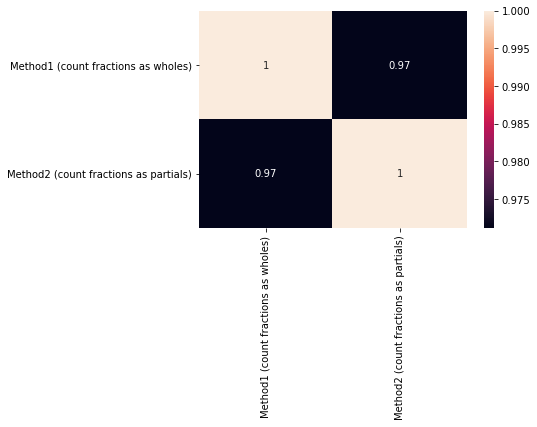

In [8]:
bathrooms_v1 = df_main[
    ["BathHalfCount", "Bath3qtrCount", "BathFullCount"]
].sum(axis=1)

bathrooms_v2 = (
    df_main["BathHalfCount"] / 2
    + df_main["Bath3qtrCount"] * 3 / 4
    + df_main["BathFullCount"]
)

bathrooms = pd.concat([bathrooms_v1, bathrooms_v2], axis=1)
bathrooms.columns = [
    "Method1 (count fractions as wholes)",
    "Method2 (count fractions as partials)",
]
corr = bathrooms.corr()
sns.heatmap(corr, annot=True)

# As we can see, it doesn't really matter which method we choose, as
# they incredibly well correlated, as would be expected. For the purposes
# of this analysis, we will use Method 2 so as to not ignore the difference
# in value that may be added by having a smaller bathroom (e.g. "half bath")


# Allows the cell to be run multiple times without an error saying the column doesn't exist (because it was already dropped)
bathroom_cols_to_drop = ["BathHalfCount", "Bath3qtrCount", "BathFullCount"]
df_main.drop(bathroom_cols_to_drop, axis=1, inplace=True)

# Add to main df
df_main["Bathrooms"] = bathrooms_v2

# One-hot encode categoricals

#### Encode "HeatSystem"

In [9]:
# First, convert encoded values to text values so we can understand their meaning
keys = get_lookups(108)
convert_to_keys = (
    lambda x: keys[str(int(x))].replace(" ", "").replace("-", "")
    if x != "0"
    else "Other"
)
heating = df_main.HeatSystem.apply(convert_to_keys)
print("Original breakdown:\n{}".format(heating.value_counts()))

# We see that Gravity is very uncommon. Lump them into the "Other" category
simplify = lambda x: "Other" if x in ["Gravity"] else x
heating = heating.apply(simplify)
print("Improved categorization:\n{}".format(heating.value_counts()))

# Now that we have appropriate categorization, let's one-hot encode
heating_dummies = pd.get_dummies(heating, prefix="Heating", drop_first=False)
heating_dummies.drop("Heating_ForcedAir", axis=1, inplace=True)

# Adjust df_main accordingly
df_main.drop("HeatSystem", axis=1, inplace=True)
df_main = pd.concat([df_main, heating_dummies], axis=1)

Original breakdown:
ForcedAir    14148
HeatPump      1536
ElecBB        1124
FloorWall      564
HotWater       447
Radiant        261
Gravity         38
Other           25
Name: HeatSystem, dtype: int64
Improved categorization:
ForcedAir    14148
HeatPump      1536
ElecBB        1124
FloorWall      564
HotWater       447
Radiant        261
Other           63
Name: HeatSystem, dtype: int64


#### Encode porch metrics

By default, the information given about porches is given in square feet. Instead of looking at the impact of porch size, we will investigate whether the presence of a deck impacts SalePrice

Encode as either enclosed, open, both, or neither. The default will be "neither", and as a result we will drop that column once encoded.

In [10]:
porches = df_main[["SqFtOpenPorch", "SqFtEnclosedPorch"]].copy()
porches.columns = ["Open", "Encl"]

classify_porches = (
    lambda x: "Both"
    if ((x.Open > 0) & (x.Encl > 0))
    else "Open"
    if x.Open > 0
    else "Closed"
    if x.Encl > 0
    else "None"
)

# Encode
porches["Porch"] = porches.apply(classify_porches, axis=1)
porches_dummies = pd.get_dummies(
    porches["Porch"], prefix="Porch", drop_first=False
)
porches_dummies.drop("Porch_None", axis=1, inplace=True)

# Add to main dataframe
df_main = pd.concat([df_main, porches_dummies], axis=1)
df_main.drop(["SqFtOpenPorch", "SqFtEnclosedPorch"], axis=1, inplace=True)

#### Create one-hot column for whether there is a garage and deck

1    9814
0    8329
Name: Garage, dtype: int64

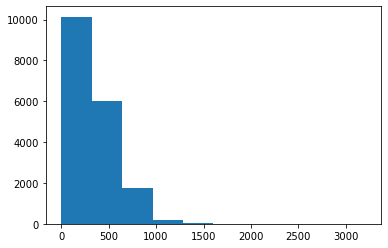

In [11]:
plt.hist(df_main.SqFtGarageAttached)
encode = lambda x: 1 if x > 0 else 0
df_main["Garage"] = df_main.SqFtGarageAttached.apply(encode)
df_main.Garage.value_counts()

In [12]:
# plt.hist(df_main.SqFtDeck)
encode = lambda x: 1 if x > 0 else 0
df_main["Deck"] = df_main.SqFtDeck.apply(encode)
# df_main.Deck.value_counts()

#### Indicate whether or not basement is finished

In [13]:
basement = df_main[["SqFtFinBasement", "SqFtUnfinBasement"]].copy()
basement.columns = ["fin", "unfin"]
classify_basements = (
    lambda x: "Unfinished"
    if ((x.fin > 0) & (x.unfin > 0))
    else "Finished"
    if x.fin > 0
    else "Unfinished"
    if x.unfin > 0
    else "None"
)

# Encode
basement["Simplified"] = basement.apply(classify_basements, axis=1)
print(basement.Simplified.value_counts())
basement_dummies = pd.get_dummies(
    basement.Simplified, prefix="Basement", drop_first=False
)
basement_dummies.drop("Basement_Unfinished", axis=1, inplace=True)

# Add to main dataframe
df_main = pd.concat([df_main, basement_dummies], axis=1)

None          9417
Unfinished    6329
Finished      2397
Name: Simplified, dtype: int64


In [49]:
df_main

,SalePrice,NbrLivingUnits,Stories,BldgGrade,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtDeck,HeatSource,BrickStone,ViewUtilization,Bedrooms,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,SaleInstrument,SqFtUnfinBasement,SqFtUnfinished,Bathrooms,Heating_ElecBB,Heating_FloorWall,Heating_HeatPump,Heating_HotWater,Heating_Other,Heating_Radiant,Porch_Both,Porch_Closed,Porch_Open,Garage,Deck,Basement_Finished,Basement_None
0,445000,1,1.0,7,1480,0,0,0,0,440,NaN,120,2,0,NaN,3,1,0,0,0,1994,0,5,3,0,0,2.00,0,0,0,0,0,0,0,0,1,1,1,0,1
1,188500,1,1.0,5,550,0,0,0,0,0,NaN,0,1,0,NaN,2,0,0,0,0,1942,0,3,3,0,0,0.75,0,1,0,0,0,0,0,0,0,0,0,0,1
2,730000,1,2.0,9,1540,380,285,8,0,0,1.0,155,3,0,1.0,3,0,1,0,0,1984,0,3,3,95,0,2.25,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1055700,1,1.0,8,2780,1390,1390,7,0,0,1.0,100,2,0,0.0,6,0,1,0,1,1967,0,3,3,0,0,1.75,0,0,0,0,0,0,0,0,0,0,1,1,0
4,565000,1,1.0,8,2230,1280,880,7,400,80,1.0,100,3,0,NaN,3,1,0,0,0,2015,0,3,3,400,0,2.00,0,0,0,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18138,391000,1,1.0,8,1910,620,620,8,0,0,1.0,100,2,0,0.0,3,0,0,0,0,1985,0,4,3,0,0,2.25,0,0,0,0,0,0,0,0,1,0,1,1,0
18139,1535000,1,2.0,9,3220,0,0,0,0,630,0.0,0,2,0,0.0,4,1,0,0,0,2015,0,3,3,0,0,3.00,0,0,0,0,0,0,0,0,0,1,0,0,1
18140,309000,1,1.5,7,960,0,0,0,0,420,NaN,0,2,0,NaN,3,1,0,0,0,1959,0,3,3,0,0,1.00,0,0,0,0,0,0,0,0,1,1,0,0,1
18141,759990,1,2.0,8,2010,0,0,0,0,440,0.0,0,2,0,0.0,4,0,1,0,0,1987,0,4,3,0,0,2.50,0,0,0,0,0,0,0,0,0,1,0,0,1


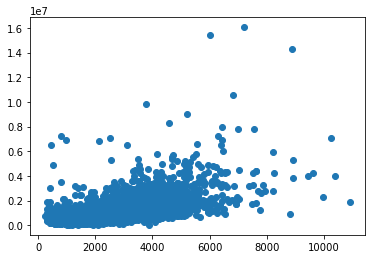

In [52]:
log_transform = lambda x: np.log(x)
x = df_main.SqFtTotLiving  # .apply(log_transform)
y = df_main.SalePrice  # .apply(log_transform)
plt.scatter(x, y)

In [23]:
pd.DataFrame(heating.value_counts())

,HeatSystem
ForcedAir,14148
HeatPump,1536
ElecBB,1124
FloorWall,564
HotWater,447
Radiant,261
Other,63


In [30]:
results[
    ["attribute", "% change in SalePrice per *unit* input increase"]
].sort_values(by="attribute").iloc[1:6]

,attribute,% change in SalePrice per *unit* input increase
1,Heating_ElecBB,-0.13
2,Heating_FloorWall,0.2
3,Heating_HeatPump,0.3
4,Heating_HotWater,0.85
5,Heating_Radiant,0.88


In [41]:
df_main

,SalePrice,NbrLivingUnits,Stories,BldgGrade,SqFtTotLiving,SqFtTotBasement,SqFtFinBasement,FinBasementGrade,SqFtGarageBasement,SqFtGarageAttached,DaylightBasement,SqFtDeck,HeatSource,BrickStone,ViewUtilization,Bedrooms,FpSingleStory,FpMultiStory,FpFreestanding,FpAdditional,YrBuilt,YrRenovated,Condition,SaleInstrument,SqFtUnfinBasement,SqFtUnfinished,Bathrooms,Heating_ElecBB,Heating_FloorWall,Heating_HeatPump,Heating_HotWater,Heating_Other,Heating_Radiant,Porch_Both,Porch_Closed,Porch_Open,Garage,Deck,Basement_Finished,Basement_None
0,445000,1,1.0,7,1480,0,0,0,0,440,NaN,120,2,0,NaN,3,1,0,0,0,1994,0,5,3,0,0,2.00,0,0,0,0,0,0,0,0,1,1,1,0,1
1,188500,1,1.0,5,550,0,0,0,0,0,NaN,0,1,0,NaN,2,0,0,0,0,1942,0,3,3,0,0,0.75,0,1,0,0,0,0,0,0,0,0,0,0,1
2,730000,1,2.0,9,1540,380,285,8,0,0,1.0,155,3,0,1.0,3,0,1,0,0,1984,0,3,3,95,0,2.25,0,1,0,0,0,0,0,0,0,0,1,0,0
3,1055700,1,1.0,8,2780,1390,1390,7,0,0,1.0,100,2,0,0.0,6,0,1,0,1,1967,0,3,3,0,0,1.75,0,0,0,0,0,0,0,0,0,0,1,1,0
4,565000,1,1.0,8,2230,1280,880,7,400,80,1.0,100,3,0,NaN,3,1,0,0,0,2015,0,3,3,400,0,2.00,0,0,0,0,0,0,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18138,391000,1,1.0,8,1910,620,620,8,0,0,1.0,100,2,0,0.0,3,0,0,0,0,1985,0,4,3,0,0,2.25,0,0,0,0,0,0,0,0,1,0,1,1,0
18139,1535000,1,2.0,9,3220,0,0,0,0,630,0.0,0,2,0,0.0,4,1,0,0,0,2015,0,3,3,0,0,3.00,0,0,0,0,0,0,0,0,0,1,0,0,1
18140,309000,1,1.5,7,960,0,0,0,0,420,NaN,0,2,0,NaN,3,1,0,0,0,1959,0,3,3,0,0,1.00,0,0,0,0,0,0,0,0,1,1,0,0,1
18141,759990,1,2.0,8,2010,0,0,0,0,440,0.0,0,2,0,0.0,4,0,1,0,0,1987,0,4,3,0,0,2.50,0,0,0,0,0,0,0,0,0,1,0,0,1


In [31]:
df_final

,SalePrice_log,Heating_ElecBB,Heating_FloorWall,Heating_HeatPump,Heating_HotWater,Heating_Radiant,SqFtTotLiving_log,Basement_Finished,Porch_Open,Porch_Closed,Porch_Both
0,13.005830,0,0,0,0,0,7.299797,0,1,0,0
1,12.146853,0,1,0,0,0,6.309918,0,0,0,0
2,13.500800,0,1,0,0,0,7.339538,0,0,0,0
3,13.869715,0,0,0,0,0,7.930206,1,0,0,0
4,13.244581,0,0,0,0,0,7.709757,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
17981,12.876463,0,0,0,0,0,7.554859,1,1,0,0
17982,14.244041,0,0,0,0,0,8.077137,0,0,0,0
17983,12.641097,0,0,0,0,0,6.866933,0,1,0,0
17984,13.541061,0,0,0,0,0,7.605890,0,0,0,0


In [35]:
df_final

,SalePrice_log,Heating_ElecBB,Heating_FloorWall,Heating_HeatPump,Heating_HotWater,Heating_Radiant,SqFtTotLiving_log,Basement_Finished,Porch_Open,Porch_Closed,Porch_Both
0,13.005830,0,0,0,0,0,7.299797,0,1,0,0
1,12.146853,0,1,0,0,0,6.309918,0,0,0,0
2,13.500800,0,1,0,0,0,7.339538,0,0,0,0
3,13.869715,0,0,0,0,0,7.930206,1,0,0,0
4,13.244581,0,0,0,0,0,7.709757,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
17981,12.876463,0,0,0,0,0,7.554859,1,1,0,0
17982,14.244041,0,0,0,0,0,8.077137,0,0,0,0
17983,12.641097,0,0,0,0,0,6.866933,0,1,0,0
17984,13.541061,0,0,0,0,0,7.605890,0,0,0,0


In [36]:
# Revert to the model used a few tries ago
inputs = df_final.drop("SalePrice_log", axis=1).columns
output = "SalePrice_log"


model, df_model = produce_model(df_main, inputs, output)
results = check_assumptions(
    model, df_model, output, verbose=False, feature_to_plot="SqFtTotLiving_log"
)

# print(model.summary())
# performance_metrics = performance_metrics.append(results)
# performance_metrics

PatsyError: Error evaluating factor: NameError: name 'SalePrice_log' is not defined
    SalePrice_log ~ Heating_ElecBB+Heating_FloorWall+Heating_HeatPump+Heating_HotWater+Heating_Radiant+SqFtTotLiving_log+Basement_Finished+Porch_Open+Porch_Closed+Porch_Both
    ^^^^^^^^^^^^^

In [14]:
path_to_db = os.path.join("..", "..", "data", "processed", "main.db")
conn = sqlite3.connect(path_to_db)

query_df = """SELECT * FROM step3_final_df"""
query_performance = """SELECT * FROM step3_performance_metrics"""

df_final = pd.read_sql(query_df, conn, index_col="index")
df_final.reset_index(drop=True, inplace=True)

performance_metrics = pd.read_sql(query_performance, conn, index_col="index")
performance_metrics.reset_index(drop=True, inplace=True)

conn.close()

#### Show final model statistics

In [15]:
x = list(df_final.drop("SalePrice_log", axis=1).columns)
model, _ = produce_model(df_final, x, "SalePrice_log")
print(model.summary())

Modeling: SalePrice_log ~ Heating_ElecBB+Heating_FloorWall+Heating_HeatPump+Heating_HotWater+Heating_Radiant+SqFtTotLiving_log+Basement_Finished+Porch_Open+Porch_Closed+Porch_Both
                            OLS Regression Results                            
Dep. Variable:          SalePrice_log   R-squared:                       0.404
Model:                            OLS   Adj. R-squared:                  0.403
Method:                 Least Squares   F-statistic:                     1217.
Date:                Sat, 13 Mar 2021   Prob (F-statistic):               0.00
Time:                        23:15:36   Log-Likelihood:                -9173.4
No. Observations:               17986   AIC:                         1.837e+04
Df Residuals:                   17975   BIC:                         1.845e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                        coef  

#### Quantify impact of coefficients given log-scaled output

In [16]:
results = pd.DataFrame(model.params).reset_index()
results.columns = ["attribute", "coeff"]
results["log_transformed?"] = ["_log" in x for x in results.attribute]

In [17]:
exp_func = lambda x: np.round(10**x, 2)-1
results['% change in SalePrice per *unit* input increase'] = results['coeff'].apply(exp_func)
results.iloc[0, -1] = 'NA'
results.loc[results['
                    
                    
                    ansformed?']==True, 
            '% change in SalePrice per *unit* input increase'] = 'NA'

In [18]:
logged_inputs_converted = []
for row in range(results.shape[0]):
    if results.iloc[row]["log_transformed?"] == True:
        x = 1.01 ** results.iloc[row]["coeff"]
        logged_inputs_converted.append(x - 1)
    else:
        logged_inputs_converted.append("NA")
results[
    "% change in SalePrice per *percent* input increase"
] = logged_inputs_converted

In [19]:
results

,attribute,coeff,log_transformed?,% change in SalePrice per *unit* input increase,% change in SalePrice per *percent* input increase
0,Intercept,7.999294,False,NA,NA
1,Heating_ElecBB,-0.058457,False,-0.13,NA
2,Heating_FloorWall,0.078050,False,0.2,NA
3,Heating_HeatPump,0.112877,False,0.3,NA
4,Heating_HotWater,0.267768,False,0.85,NA
5,Heating_Radiant,0.273241,False,0.88,NA
6,SqFtTotLiving_log,0.710611,True,NA,0.00709587
7,Basement_Finished,0.071071,False,0.18,NA
8,Porch_Open,0.033703,False,0.08,NA
9,Porch_Closed,0.102850,False,0.27,NA


In [20]:
transform = lambda x: 10**x
x = df_final.SalePrice_log.apply(transform)
x.mean() / 10**6

77932103.86948921

## Findings

### Enclosing the porch
Take note of the **Porch_** metrics in the *Results* table. Note that these are one-hot encoded, with the default being no porch at all. To put it into context, homes with *Open* porches tend to sell for roughly 8% more than homes without a porch at all. However, that number jumps to 27% for homes with *Enclosed* porches, meaning that homes with *enclosed* porches sell for nearly 20% more than homes with *open* porches. It looks like it's time to enclose that porch of yours!

### Finishing the basement
Refer to the **Basement_Finished** row in the *Results* table. This is one-hot encoded to indicate whether or not a basement is finished or unfinished. Note that this excludes homes with no basement at all. As we can see, homes with finished basements typically sell for 18% more than homes with unfinished basements. Maybe it's worth the time and money to get it finished up. 

### Choosing a heating system
Refer to the **Heating_** rows in the *Results* table. These are one-hot encoded values, with the default being Forced Air, given that it is by far the most common. It is used in over 75% of the 18,000 homes analyzed. Here, the results are unrealistically extreme. Instead of looking at the degree to which a heating system can impact home price, let's instead view it as a *trend*. The heating sources in the most expensive sales are Radiant and Hot Water. Heat pump and Floor-Wall are also correlated with a higher price than Forced Air. Coming in last, Electric Baseboard heating is associated with the lowest sale prices of homes. 

### Consider an add-on
Amongst the strongest predictors of sale price is the **Livable Square Feet** in a home. This is not surprising. The relationship is striking: for every 10% increase in square footage, there is a 7% increase in home value. That's substantial. It is also a possible explanation as to why finishing the basement can have such a positive impact. 